In [1]:
import numpy as np
import pymc3 as pm
import exoplanet as xo
import matplotlib.pyplot as pl
from SpecGP import distributions
from SpecGP import terms
import theano.tensor as tt
%matplotlib inline

In [158]:
term = xo.gp.terms.SHOTerm(log_S0=1, log_w0=1, log_Q=-np.log(np.sqrt(2)))
alpha = np.array([1, 2, 3, 20])
#alpha = alpha[:, None] * alpha[None, :]
kernel = terms.KroneckerTerm(term, alpha)
#kernel = kernel + kernel

In [159]:
t = np.linspace(0, 100, 100)
kernel.posdef(t, 0.000000001 * np.ones((len(t), 4)).T).eval()

/Users/tgordon/Library/Python/3.7/lib/python/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


array(True)

In [160]:
gp = xo.gp.GP(kernel, t, diag=0.000000001 * np.ones((len(t), 4)).T, J=2)

In [161]:
y = gp.dot_l(np.random.randn(4*len(t), 1)).eval()

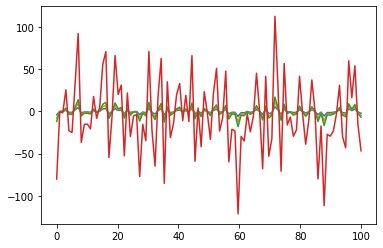

In [162]:
pl.plot(t, y[::4])
pl.plot(t, y[1::4])
pl.plot(t, y[2::4])
pl.plot(t, y[3::4])

In [ ]:
import theano.tensor as tt
arr = tt.as_tensor_variable(np.array([1, 2]))

In [ ]:
arr.ndim

In [ ]:
for term in gp.kernel.terms:
    print(term.alpha)

In [ ]:
Kx = term.term.value(t[:, None] - t[None, :])

In [ ]:
K = Kx.eval()

In [ ]:
np.kron(K, term.alpha.eval())

In [ ]:
term.alpha.eval()

In [ ]:
import theano.tensor as tt
arr = tt.as_tensor_variable([[1, 2], [2, 1]])
tt.slinalg.cholesky(arr).eval()

In [ ]:
arr